**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje Automático** - Primera parte


**Grupo 28** <br>
Docente: Laura Montes<br>

Integrantes:
*   Gustavo Alvarez Lupu
*   Laura Hayas
*   Maria Emilia Santacruz
*   Nicolás Ambrosis



# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Users\nico.-\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
# Con esta celda podemos analizar en profundidad el contenido del dataset de Boston


print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# se analiza el tamaño del dataset y de las etiquetas
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [ ]:
# se visualizan las etiquetas
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
# para hacer la división entre entrenamiento y evaluación se utiliza la clase train_test_split de la librería sklearn

from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea




**1. ¿De qué se trata el conjunto de datos?**

Son caracteristicas relacionadas las propiedades de la ciudad de Boston y las zonas donde se encuentran esas propiedades.  

**2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**

La variable objetivo es MEDV (feature 14) que es el valor medio de las propiedades ocupadas por los dueños, expresado en miles de dólares. 

**3. ¿Qué información (atributos) hay disponibles para hacer la predicción?**
Atributos.
- CRIM: tasa de criminalidad per capita por ciudad.
- ZN: proporción de suelo residencial zonificado por lote de mas de 25,000 pies cuadrados.
- INDUS: proporción de acres (1 acre = 0.4 hectáreas) comerciales no minoristas por ciudad.
- CHAS: Variable ficticia (dummy) de limitacion al rio Charles (= 1 si limita, = 0 si no).
- NOX: Concentración de óxido nítrico (medida en partes por 10 millones).
- RM: número promedio de habitaciones por propiedad.
- AGE: proporción de casas ocupadas construidas antes de 1940.
- DIS: distancia ponderada a 5 centros de empleo.
- RAD: índice de accesibilidad a autopistas.
- TAX: tasa de impuestos por cada 10,000 USD de valor de la propiedad.
- PTRATIO: relacion de cantidad de alumno-maestro por ciudad.
- B: 1000(Bk - 0.63)^2 donde Bk es la proporcion de población negra por ciudad.
- LSTAT: porcentaje de poblacion de clase baja.


Target.
- MEDV: Valor medio de las propiedades ocupadas expresados en miles de dolares.

**4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?**
A priori podemos suponer que los atributos mas importantes para la prediccion del precio de la propiedad son:
    -CRIM
    -RM
    -AGE
    -DIS
    -RAD
    -TAX
    -PTRATIO
    -B
    -LSTAT

**5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.**
En primer lugar, consideramos que los datos estan desactualizados. Estos datos fueron publicados en 1978 y muchos de ellos ya no tienen valor actualmente. No son datos que puedan ser utilizados para predecir el precio de propiedades hoy en día.

Por otro lado, vemos que hay variables consideradas que pueden ser discriminatorias para ciertas partes de la poblacion. Por ejemplo la proporcion de poblacion negra (B) y la proporcion de poblacion de clase baja (LSTAT) son variables que introducen un sesgo muy marcado.


## Ejercicio 2: Visualización de los Datos



1. **Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.**

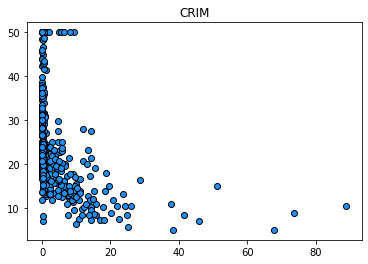

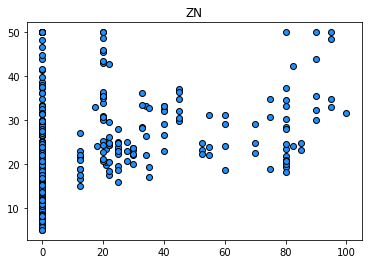

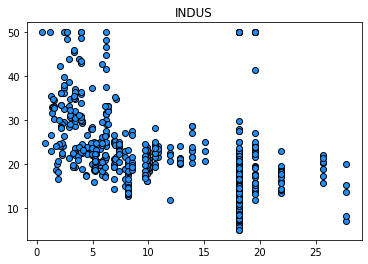

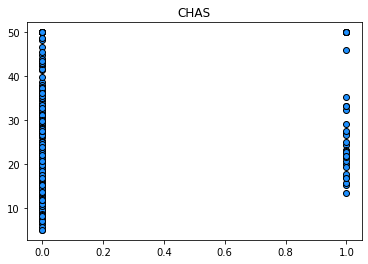

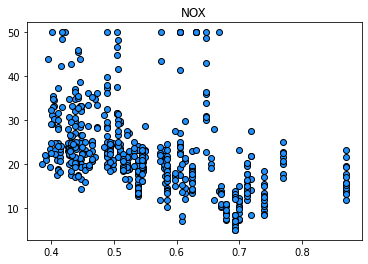

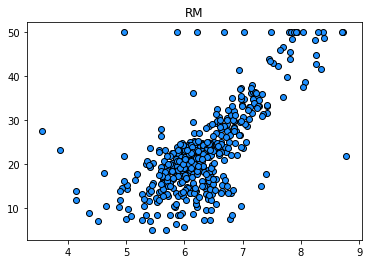

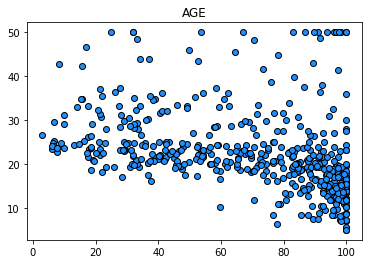

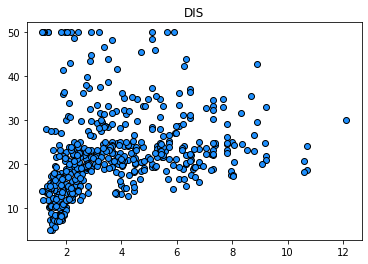

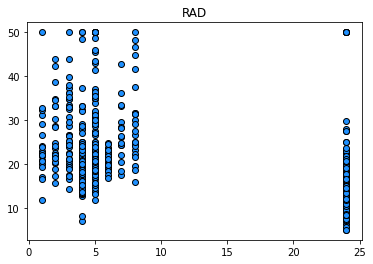

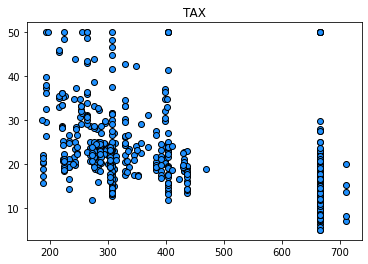

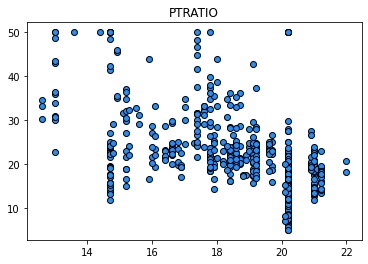

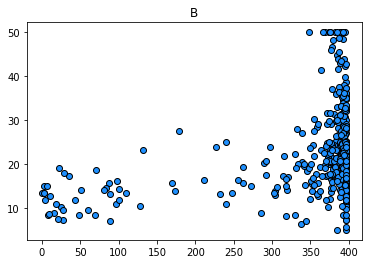

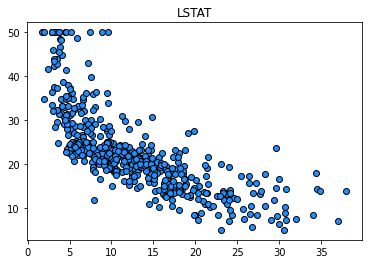

In [ ]:
# se utilza un for loop para realizar scatter plot de cada variabe Vs la variable objetivo (MEDV)
# el título de cada gráfico indica la variable analizada.
for i in boston['feature_names']:
    feature = i
    selector = (boston['feature_names'] == feature)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(i)
    plt.show()
    print('\n')

**2. Estudie las gráficas, identificando a ojo los atributos que a su criterio sean los más informativos para la predicción.**<br>
**Conclusion Parcial:**<br>
Haciendo un análisis gráfico de las relaciones entre las diferentes variables y el precio de las propiedades vemos que las variables RM y LSTAT son las que podrían describir mejor el precio de las propiedades.

In [ ]:
# se realiza un análisis numérico de correlaciones
# en primer lugar se convierten el dataset de boston y la variable target en dataframes

df_x = pd.DataFrame(X, columns = boston.feature_names)
df_y = pd.DataFrame(y, columns = ['MEDV'])

In [ ]:
# los dataframes obtenido en el bloque anterior se concatenan para tener todos los datos en el mismo df
df = pd.concat([df_x, df_y], axis = 1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# se genera la matriz de correlación
df.corr()['MEDV'].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

**3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.**<br>
**Conclusión:** Combinando el análisis gráfico con el análisis numérico, consideramos que los atributos con mayor imfluencia sobre el precio de las propiedades son:  
 - LSTAT: porcentaje de poblacion de clase baja.
 - RM: numero promedio de habitaciones por propiedad.


## Ejercicio 3: Regresión Lineal



**1. Seleccione un solo atributo que considere puede ser el más apropiado.**

In [ ]:
# 1.Seleccionamos el atributo 'RM'.
feature = 'RM'  
selector = (boston['feature_names'] == feature)

# dividimos los datos en grupo de entrenamiento y grupo de test
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

**2. Instancie una regresión lineal de scikit-learn, y entrénela usando sólo el atributo seleccionado.**

In [ ]:
# 2. Instanciar y entrenar acá.

# Se Instancia la clase LinearRegression.
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression(fit_intercept=True)

# Se entrena el modelo utilizando los datos de entrenamiento.
model_lr.fit(X_train_f, y_train)

LinearRegression()

**3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.**

In [ ]:
# 3. Predecir y evaluar acá.

# Se obtienen los valores predichos tanto para entrenamiento como para test.
y_train_predict = model_lr.predict(X_train_f)
y_test_predict = model_lr.predict(X_test_f)


In [ ]:
# Se calcula el error cuadrático medio sobre ambos subconjuntos de datos.
# Para eso se utiliza la clase mean_squared_error de sklearn. 

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_predict)
test_error = mean_squared_error(y_test, y_test_predict)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 42.820479
Test error: 46.907352


**4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.**

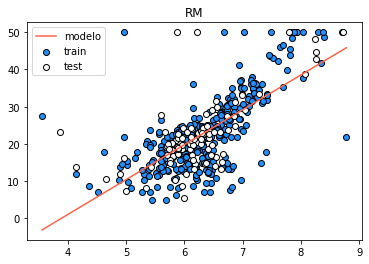

In [ ]:
# 4. Graficamos acá. 
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model_lr.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [ ]:
# Se evalúa el valor del coeficiente que define la pendiente del modelo de regresión lienal 
model_lr.coef_

array([9.37638431])

In [ ]:
# Se evalúa el valor del coeficiente que define la ordenada al origen del modelo de regresión lienal 
model_lr.intercept_

-36.476189627647315

**5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.**


**Conclusión**

El error cuadrático medio para el grupo de test que podemos observar trabajando solamente con la variable RM es de 46.9. Analizando este valor de manera aislada, consideramos que es un error grande y que no sería correcto utilizar esta única variable para predecir el precio de las propiedades.


## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

**1. Para varios grados de polinomio, haga lo siguiente:<br>**
      a. Instancie y entrene una regresión polinomial.<br>
      b. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.<br>
      c. Guarde los errores en una lista.

In [ ]:
#Se conviertes los datos entrenamiento y test vectores de una dimension.

X_train_f = X_train_f.reshape(-1, 1)
X_test_f = X_test_f.reshape(-1, 1)

X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# Se evaluarán modelos de regresión polinomiales.

# Se importan todas las librerías que serán necesarias para este proceso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


#  Se definen dos listas en las que se guardarán los valores de error cuadrático medio de los modelos polinomiales
# sobre los grupos de entrenamiento y validación.
train_errors = []
test_errors = []


# Se utiliza un for loop para entrenar secuencialmente modelos de grado 0 a 9.
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
# Se visualizan los errores cuadráticos medio obtenidos.
train_errors, test_errors 

([85.1437202235075,
  42.82047894172751,
  37.74552897028125,
  36.395658757671086,
  34.808446256913044,
  33.13112157195812,
  33.13011641557147,
  33.060358764691614,
  33.06035722339169,
  32.854877288415494],
 [81.58231743908232,
  46.9073516273953,
  39.794731163726546,
  39.82576208821606,
  41.553925675792634,
  41.038288572152986,
  41.00917696584963,
  42.39410989721953,
  42.39918247839398,
  46.0396055751435])

**2. Grafique las curvas de error en términos del grado del polinomio.**

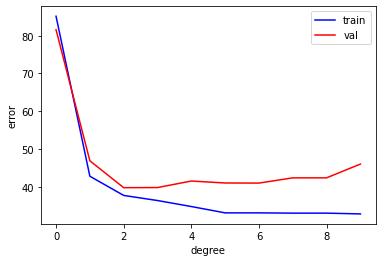

In [ ]:
# Se grafica el error cuadrático medio en función del grado del polinomio para el grupo de entrenamiento y el grupo de
# validación o test.

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

**3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.**

**Conclusión**
En la figura anterior se observa que para polinomios de grado 3 en adelante, el error cuadrático medio asociada al grupo de validación comienza a aumentar. Este resultado sugiere que a partir de polinomios de grado 3 comienza a haber sobreajuste.

**4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.**

In [ ]:
# Se selecciona un polinomio de grado 2 para avanzar con el análisis

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

In [ ]:
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

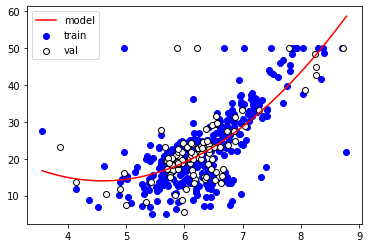

In [ ]:
# Se grafica el modelo polinomial de grado 2 obtenido sobre los puentos que indican 
# los datos de entrenamiento y validación.

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="val")
plt.legend()
plt.show()

In [ ]:
# Se obtienen los valores predichos para el grupo de datos de entrenamiento y test
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

In [ ]:
# Se obtienen los valores de error cuadrático medio para los grupos de entrenamiento y test
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 37.745529
Test error: 39.794731


**5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.**

**Conclusión**
Comparando el error cuadrático obtenido para el modelo de regresión lineal con el propio error obtenido para el modelo polinominal podemos ver que en este segundo caso el error es menor. Esto constituye una mejora respecto del modelo anterior. Sin embargo el error sigue siendo bastante considerable y aún estamos lejos de tener un modelo aceptable para la predicción de precios. 


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

**1. Seleccione dos o tres atributos entre los más relevantes encontrados en el ejercicio 2.**

In [ ]:
# 1. Se elijen los atributos ´LSTAT´ y ´RM´
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

**2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.**

In [ ]:
# Se importan todas las librerías que serán necesarias para este proceso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#  Se definen dos listas en las que se guardarán los valores de error cuadrático medio de los modelos polinomiales
# sobre los grupos de entrenamiento y validación.
train_errors = []
test_errors = []

# Se utiliza un for loop para entrenar secuencialmente modelos de grado 0 a 9.
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model_final = make_pipeline(pf, lr)
    model_final.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model_final.predict(X_train_fs)
    y_test_pred = model_final.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
# Se visualizan los errores cuadráticos medios obtenidos.
train_errors, test_errors 

([85.1437202235075,
  28.790276482053443,
  18.659453833139377,
  17.077754022370822,
  14.188503706315943,
  12.905613730166126,
  12.352154892220819,
  12.206446099502447,
  11.940956263802198,
  12.195294862329407],
 [81.58231743908232,
  37.383105638779945,
  28.144971863123704,
  28.56716643527473,
  33.99923337103693,
  34.201411390932755,
  34.92382507162666,
  70.28116011845859,
  546.4299157544074,
  1104.4877122116038])

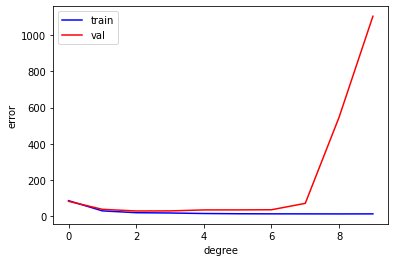

In [ ]:
# Se grafica el error cuadrático medio en función del grado del polinomio para el grupo de entrenamiento y el grupo de
# validación o test.

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

**Conclusión**
En la figura anterior vemos que, utilizando dos atributos para entrenar el modelo polinomial, comenzamos a detectar indicios de sobreajuste a partir de modelos de grado 6.

Dado que los modelos de grado 2 a 6 no presentan diferencias significativas en el error cuadrático medio, decidimos seguir adelante con un modelo polinomial de grado 2.

In [ ]:
# Generamos vectores de características polinomiales.

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model_final = make_pipeline(pf, lr)

In [ ]:
model_final.fit(X_train_fs, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [ ]:
# se obtienen los valores predichos por el nuevo modelo. 
y_train_pred = model_final.predict(X_train_fs)
y_test_pred = model_final.predict(X_test_fs)

In [ ]:
# Se cualculan los errores cuadrátios medios para cada grupo
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 18.659454
Test error: 28.144972


**3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?**<br>
Analizando el error cuadrático medio (ECM) para el grupo de entrenamiento y el grupo de validación(test) llegamos a la conclusión de que, utilizando 2 features para entrenar el modelo de regresión polinominal, lo mejor es utilizar un polinomio de grado 2. Este polinomio es el que presenta el menor error para el grupo de validación. Con polinomio de mayor grado se empieza a sobreajustar el modelo a los datos de entrenamiento; el ECM para los datos de entrenamiento sigue disminuyendo pero el ECM para los datos de validacion comienza a aumentar.<br>

Si comparamos los resultados obtenidos para el modelo entrenado con 1 feature vs el modelo entrenado con 2 features vemos que el segundo arroja mejores resultados que el primero. Se observa que el ECM del modelo entrenado con RM y LSTAT presenta un error cuadratico medio menor que el modelo entrenado solo con RM (28.144972 Vs 39.794731).

Sin embargo el error del modelo sigue siendo bastante importante, con lo cual tendríamos que seguir investigando nuevas feature y tal vez otros algoritmos de entrenamiento para dar con un modelo de prediccíon más adecuado.




## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
